In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


#Aim: 
To train a random neural network on Genetically generated data and test on real images.

# Procedure:
1. Train a model ($M_1$) on CIFAR10 dataset.
2. Generate synthetic data using $M_1$.
3. Initialize a random neural network ($M_2$).
4. Train $M_2$ on synthetic data and test on real images.
5. Also train $M_2$ on Fashion dataset while rehearsing on synthetic CIFAR10 dataset.
6. Plot the retention and learning behavior of $M_2$.

In [ ]:
from Genetic_Rehearsal import *

Using TensorFlow backend.


# Training a model ($M_1$) on Grayscale CIFAR10 dataset.

It has the following steps

1. Load the original data
2. Create a model
3. Train the model on original data

In [ ]:
#VERIFIED

import keras
from keras.datasets import cifar10
import numpy as np

(x_train_h, y_train_h), (x_test_h, y_test_h) = cifar10.load_data()

x_train_h = x_train_h/255
x_test_h = x_test_h/255

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
# VERIFIED 

import cv2

x_train_resized = []
x_test_resized = []

for i in range(x_train_h.shape[0]):
  x_train_resized.append(cv2.resize(x_train_h[i],(28,28)))

  if i<10000:
    x_test_resized.append(cv2.resize(x_test_h[i],(28,28)))

x_train_resized = np.array(x_train_resized)
x_test_resized = np.array(x_test_resized)

print(x_train_resized.shape)
print(x_test_resized.shape)

(50000, 28, 28, 3)
(10000, 28, 28, 3)


In [ ]:
x_train_resized = np.float32(x_train_resized)
x_test_resized = np.float32(x_test_resized)

x_train_h = []
x_test_h = []

for i in range(50000):
  x_train_h.append(cv2.cvtColor(x_train_resized[i], cv2.COLOR_BGR2GRAY))

for i in range(10000):
  x_test_h.append(cv2.cvtColor(x_test_resized[i], cv2.COLOR_BGR2GRAY))

print("The data has the shape: ",x_train_h[0].shape, " and is stored in format of ",type(x_train_h) 
,"with a length of ", len(x_train_h))

The data has the shape:  (28, 28)  and is stored in format of  <class 'list'> with a length of  50000


In [ ]:
for i in range(50000):
  x_train_h[i] = np.reshape(x_train_h[i],(1,784))

for i in range(10000):
  x_test_h[i] = np.reshape(x_test_h[i],(1,784))

print(x_train_h[0].shape)
print(x_test_h[0].shape)

x_train_h = np.concatenate(x_train_h,axis=0)
x_test_h = np.concatenate(x_test_h,axis=0)

print(x_train_h.shape)
print(x_test_h.shape)

(1, 784)
(1, 784)
(50000, 784)
(10000, 784)


In [ ]:
pre_y_train_h = y_train_h
pre_y_test_h = y_test_h

y_test_h = keras.utils.to_categorical(y_test_h, 20)
y_train_h = keras.utils.to_categorical(y_train_h, 20)

x_train_h = np.reshape(x_train_h,(50000,784))
x_test_h = np.reshape(x_test_h,(10000,784))

# x_train_h = np.reshape(x_train_h,(50000,28,28,1))
# x_test_h = np.reshape(x_test_h,(10000,28,28,1))

##  Loading MNIST Fashion dataset

In [ ]:
from keras.datasets import fashion_mnist
import copy

(x_train_f, y_train_f), (x_test_f, y_test_f) = fashion_mnist.load_data()

x_train_f = x_train_f/255
x_test_f = x_test_f/255

y_train_f = copy.deepcopy(y_train_f)
y_test_f = copy.deepcopy(y_test_f)

y_train_f += 10
y_test_f += 10

x_train_f = np.reshape(x_train_f,(60000,784))
x_test_f = np.reshape(x_test_f,(10000,784))

y_train_f = keras.utils.to_categorical(y_train_f,20)
y_test_f = keras.utils.to_categorical(y_test_f,20)

4423680/4422102 [==============================] - 1s 0us/step


## Create the model ($M_1$)

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, Activation, Dropout, MaxPooling2D
from keras.optimizers import SGD

model = Sequential()

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(20, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
score = model.evaluate(x_test_h, y_test_h, verbose=1)
print(score[1]*100)


10000/10000 [==============================] - 1s 74us/step
9.97999981045723


## Train the model ($M_1$) on Grayscale CIFAR10 dataset.


In [ ]:
history_original = model.fit(x_train_h,y_train_h,verbose=1,epochs=30,batch_size=100,validation_data=(x_test_h,y_test_h))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 6s 114us/step - loss: 2.0233 - accuracy: 0.2657 - val_loss: 1.8927 - val_accuracy: 0.3202
Epoch 2/30
50000/50000 [==============================] - 5s 108us/step - loss: 1.8597 - accuracy: 0.3340 - val_loss: 1.8189 - val_accuracy: 0.3562
Epoch 3/30
50000/50000 [==============================] - 6s 112us/step - loss: 1.7866 - accuracy: 0.3648 - val_loss: 1.7746 - val_accuracy: 0.3754
Epoch 4/30
50000/50000 [==============================] - 6s 113us/step - loss: 1.7339 - accuracy: 0.3834 - val_loss: 1.7480 - val_accuracy: 0.3757
Epoch 5/30
50000/50000 [==============================] - 6s 114us/step - loss: 1.6837 - accuracy: 0.4018 - val_loss: 1.7006 - val_accuracy: 0.3990
Epoch 6/30
50000/50000 [==============================] - 6s 112us/step - loss: 1.6511 - accuracy: 0.4141 - val_loss: 1.6792 - val_accuracy: 0.4004
Epoch 7/30
50000/50000 [==============================] - 6s 1

In [ ]:
print(history_original.history['val_accuracy'])

[0.32019999623298645, 0.3562000095844269, 0.37540000677108765, 0.3756999969482422, 0.39899998903274536, 0.4004000127315521, 0.40959998965263367, 0.4129999876022339, 0.42730000615119934, 0.42559999227523804, 0.4268999993801117, 0.4424000084400177, 0.44339999556541443, 0.4453999996185303, 0.44369998574256897, 0.4505999982357025, 0.44940000772476196, 0.4593000113964081, 0.44429999589920044, 0.4505999982357025, 0.4453999996185303, 0.45249998569488525, 0.4530999958515167, 0.4392000138759613, 0.4523000121116638, 0.4512999951839447, 0.43709999322891235, 0.450300008058548, 0.44290000200271606, 0.4372999966144562]


# Train the model on Genetic data

Training on genetic data has the following steps

1. Create the genetic data
2. Enrich the generated data
3. Initialize a random neural network ($M_2$) 
4. Train the model on the data

## Creating the genetic data

In [ ]:
import datetime

start = datetime.datetime.now()

In [ ]:
population_size=16
NUMBER_OF_CULTURES = 30
NUMBER_OF_GENERATIONS = 30
MUTATION_PROBABILITY = 0.1
MUTATION_TYPE = "+"
INTERMEDIATE_POINT_COLLECTION = 0

In [ ]:
from heapq import nlargest
import random

pseudo_x_train_2400 = np.zeros((0,784))

POINTS_GATHERED = []
ideal_points = []

for class_number in range(10):
# for class_number in [3]:
  POINTS_COUNTER=0
  print("Class number: ", class_number)

  for p in range(NUMBER_OF_CULTURES): #30 This loop is responsible for increasing samples per class.

#*************************************************************************#
    ### SECTION 1: CREATING THE INITIAL POPULATION ###

    print("\n Creating the intitial population ...")
    current_generation=[]
    for i in range(population_size):
      current_generation.append(np.zeros((784)))
      # current_generation.append(np.random.rand((784)))
    print("Population created ... \n\n")

#*************************************************************************#
    ### SECTION 2: DECIDING THE STOPPING CRITERIA ###
    
    best = 0
    best_list=[]

    # while True:
    while best*100 < 90:
    # for generation_number in range(NUMBER_OF_GENERATIONS):
      current_generation_fitness=[]

      for i in range(population_size):

        test_point = np.reshape(current_generation[i],(1,784))

#*************************************************************************#
    ### SECTION 3: TESTING THE CURRENT GENERATION ###

        # test_point = np.reshape(test_point,(1,28,28,1))
        test_point = np.reshape(test_point,(1,784))
        fitness_score = model.predict(test_point)[0][class_number]
        class_prediction= model.predict_classes(test_point)

#*************************************************************************#
    ### SECTION 4:INTERMEDIATE POINT COLLECTION ###

        if INTERMEDIATE_POINT_COLLECTION == 1:
          # print("Fitness: ",fitness_score," Prediction: ",class_prediction, "organism: ",i)
          if class_prediction == class_number and i >= int(population_size/4):

            # ideal_points.append(np.reshape(test_point,(28,28,1)))
            # ideal_points.append(np.reshape(test_point,(2,)))
            ideal_points.append(np.reshape(test_point,(784,)))

            POINTS_COUNTER += 1

        current_generation_fitness.append(fitness_score)

#*************************************************************************#
    ### SECTION 5: SELECTING THE FITTEST INDIVIDUALS ###

      if max(current_generation_fitness) >= best:
        best = max(current_generation_fitness)

      print("Best: ",best*100, " Culture number: ",p," Class number: ",class_number)
      
      fittest_four_model_indices = nlargest(int(population_size/4), range(len(current_generation_fitness)), current_generation_fitness.__getitem__)
  
      # VERIFIED
      temp_list=[]
      for temp in range(int(population_size/4)):
        temp_list.append(np.copy(current_generation[fittest_four_model_indices[temp]]))
      

      # VERIFIED
      for temp in range(int(population_size/4)):
        current_generation[temp] = np.copy(temp_list[temp])
     
  
      # Mutations
      # VERIFIED
      for temp in range((int(population_size/4)),(int(population_size/2))):
        current_generation[temp] = np.copy(current_generation[temp-(int(population_size/4))])
     
  
      # VERIFIED
      for i in range((int(population_size/4)),(int(population_size/2))):
        point_mutation=np.random.choice([0,abs(np.random.normal(0,1,[1]))],size=current_generation[i].shape, p=[(1-MUTATION_PROBABILITY),MUTATION_PROBABILITY])
        # point_mutation=np.random.choice([0,0.6],size=current_generation[i].shape, p=[(1-MUTATION_PROBABILITY),MUTATION_PROBABILITY])

        if MUTATION_TYPE == "*":
          choice=random.choice(["+","-","*"])
          if choice== "-":
            current_generation[i] = current_generation[i] - point_mutation
          elif choice=="+":
            current_generation[i] = current_generation[i] + point_mutation
        elif MUTATION_TYPE == "+":
          current_generation[i] = current_generation[i] + point_mutation
        else:
          current_generation[i] = current_generation[i] - point_mutation
      
      
      # crossover
      # VERIFIED
      for temp in range((int(population_size/2)),(int(population_size*0.75))):
        current_generation[temp] = np.copy(current_generation[temp-(int(population_size/2))])
     
  
      # VERIFIED
      for temp in range((int(population_size/2)),(int(population_size*0.75))):
        if temp%2 == 0:
          crossover(current_generation[temp],current_generation[temp+1],int((current_generation[temp].shape)[0]/2))
      # crossover(current_generation[10],current_generation[11],int((current_generation[10].shape)[0]/2))
  
      # mutated crossover
      # VERIFIED
      for temp in range((int(population_size*0.75)),population_size):
        current_generation[temp] = np.copy(current_generation[temp-(int(population_size/2))])
  
      # VERIFIED
      for temp in range((int(population_size*0.75)),population_size):
        if temp%2 == 0:
          crossover(current_generation[temp],current_generation[temp+1],int((current_generation[temp].shape)[0]/2))
    for k in range(len(current_generation)):
      pseudo_x_train_2400 = np.vstack((pseudo_x_train_2400,np.reshape(current_generation[k],(1,784))))


#*************************************************************************#
    ### SECTION : ANOTHER SECTION FOR INTERMEDIATE POINT COLLECTION ###

if INTERMEDIATE_POINT_COLLECTION == 1:
  POINTS_GATHERED.append(POINTS_COUNTER)
  print("Total number of points gathered: ",POINTS_GATHERED)
  print("Ideal points: ",len(ideal_points))
  print(np.array(ideal_points).shape)
  pseudo_x_train_2400 = np.vstack((pseudo_x_train_2400,ideal_points))  


print("Generated data: ",pseudo_x_train_2400.shape)

Streaming output truncated to the last 5000 lines.
Best:  83.92428159713745  Culture number:  4  Class number:  0
Best:  87.47272491455078  Culture number:  4  Class number:  0
Best:  90.50076007843018  Culture number:  4  Class number:  0

 Creating the intitial population ...
Population created ... 


Best:  0.5960000213235617  Culture number:  5  Class number:  0
Best:  2.1917156875133514  Culture number:  5  Class number:  0
Best:  4.912049695849419  Culture number:  5  Class number:  0
Best:  4.912049695849419  Culture number:  5  Class number:  0
Best:  9.452663362026215  Culture number:  5  Class number:  0
Best:  33.93816947937012  Culture number:  5  Class number:  0
Best:  34.14598107337952  Culture number:  5  Class number:  0
Best:  66.56305193901062  Culture number:  5  Class number:  0
Best:  83.68334770202637  Culture number:  5  Class number:  0
Best:  84.34211015701294  Culture number:  5  Class number:  0
Best:  90.83678126335144  Culture number:  5  Class number:  0


In [ ]:
from sklearn.utils import class_weight

print(pseudo_x_train_2400.shape)

# temp = np.reshape(pseudo_x_train_2400,(pseudo_x_train_2400.shape[0],28,28,1))
pseudo_y_train_2400 = model.predict_classes(pseudo_x_train_2400)

pre_pseudo_y_train_2400 = pseudo_y_train_2400
pseudo_y_train_2400 = keras.utils.to_categorical(pseudo_y_train_2400, 20)
print("Training data shape: ",pseudo_x_train_2400.shape)
print("Training labels shape: ",pseudo_y_train_2400.shape)

(4800, 784)
Training data shape:  (4800, 784)
Training labels shape:  (4800, 20)


[481, 494, 442, 493, 473, 521, 404, 505, 475, 512]
4800


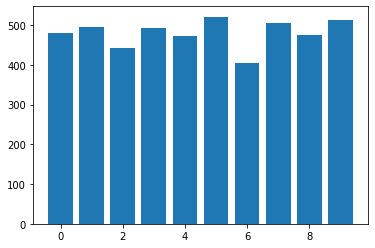

In [ ]:
# SANITY CHECK

import matplotlib.pyplot as plt

count = [0,0,0,0,0,0,0,0,0,0]
for i in range(pseudo_x_train_2400.shape[0]):
  count[pre_pseudo_y_train_2400[i]]+=1

print(count)
print(sum(count))

plt.bar(range(len(count)),count)
plt.show()

## Enriching the genetic data

### Enrichment step 1

In [ ]:
help(Enrichment)

Help on function Enrichment in module Genetic_Rehearsal:

Enrichment(data, labels, model, NUMBER_OF_CENTERS, NUMBER_OF_CLASSES, NUMBER_OF_SAMPLES, verbose=0)
    Enriches the given data by fitting a Gaussian Mixture model with
    NUMBER_OF_CENTERS and NUMBER_OF_SAMPLES



In [ ]:
NUMBER_OF_SAMPLES = int(pseudo_x_train_2400.shape[0])*2
temp = Enrichment(pseudo_x_train_2400,pseudo_y_train_2400,model,10,20,NUMBER_OF_SAMPLES=NUMBER_OF_SAMPLES)

synthetic_data = temp[0]
synthetic_labels = temp[1]

print("Training data shape: ",synthetic_data.shape)
print("Training labels shape: ",synthetic_labels.shape)

9600/9600 [==============================] - 0s 42us/step
Training data shape:  (9600, 784)
Training labels shape:  (9600, 20)


[887, 1522, 842, 1164, 755, 1119, 448, 1138, 636, 1089]
9600


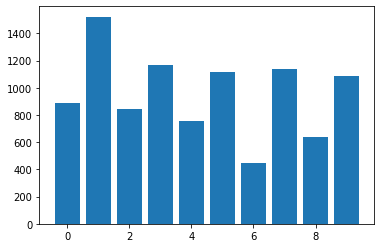

In [ ]:
# Sanity check:

count = [0,0,0,0,0,0,0,0,0,0]
for i in range(temp[2].shape[0]):
  count[temp[2][i]] += 1

print(count)
print(sum(count))

plt.bar(range(len(count)),count)
plt.show()

### Enrichment Step 2

In [ ]:
NUMBER_OF_SAMPLES = 1000000

temp = Enrichment(synthetic_data,synthetic_labels,model,1,20,NUMBER_OF_SAMPLES)

new_synthetic_data = temp[0]
new_synthetic_labels = temp[1]

print("Training data shape: ",new_synthetic_data.shape)
print("Training labels shape: ",new_synthetic_labels.shape)

1000000/1000000 [==============================] - 42s 42us/step
Training data shape:  (1000000, 784)
Training labels shape:  (1000000, 20)


In [ ]:
pre_new_synthetic = temp[2]

In [ ]:

end = datetime.datetime.now()

print(start)
print(end)

2020-12-01 11:17:11.423581
2020-12-01 11:23:02.164795


## Train the model ($M_2$) on Genetic data

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, Activation, Dropout, MaxPooling2D
from keras.optimizers import SGD

model_genetic = Sequential()

model_genetic.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model_genetic.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model_genetic.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_genetic.add(Dense(20, activation='softmax'))

model_genetic.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_genetic = model_genetic.fit(new_synthetic_data,new_synthetic_labels,verbose=1,epochs=30,batch_size=1000,validation_data=(x_test_h,y_test_h),shuffle=True)

Train on 1000000 samples, validate on 10000 samples
Epoch 1/30
1000000/1000000 [==============================] - 35s 35us/step - loss: 1.5029 - accuracy: 0.4570 - val_loss: 2.4378 - val_accuracy: 0.2204
Epoch 2/30
1000000/1000000 [==============================] - 36s 36us/step - loss: 1.2187 - accuracy: 0.5533 - val_loss: 2.3597 - val_accuracy: 0.2654
Epoch 3/30
1000000/1000000 [==============================] - 35s 35us/step - loss: 1.1076 - accuracy: 0.5912 - val_loss: 2.1889 - val_accuracy: 0.3003
Epoch 4/30
1000000/1000000 [==============================] - 35s 35us/step - loss: 1.0361 - accuracy: 0.6167 - val_loss: 2.1722 - val_accuracy: 0.3202
Epoch 5/30
1000000/1000000 [==============================] - 36s 36us/step - loss: 0.9805 - accuracy: 0.6361 - val_loss: 2.1933 - val_accuracy: 0.3325
Epoch 6/30
1000000/1000000 [==============================] - 37s 37us/step - loss: 0.9338 - accuracy: 0.6524 - val_loss: 2.2205 - val_accuracy: 0.3429
Epoch 7/30
1000000/1000000 [========

In [ ]:
print(history_genetic.history['val_accuracy'])

[0.22040000557899475, 0.2653999924659729, 0.3003000020980835, 0.32019999623298645, 0.33250001072883606, 0.34290000796318054, 0.33469998836517334, 0.34860000014305115, 0.3465999960899353, 0.3440000116825104, 0.3765000104904175, 0.3617999851703644, 0.36959999799728394, 0.36230000853538513, 0.36410000920295715, 0.375, 0.37310001254081726, 0.375, 0.37279999256134033, 0.3799000084400177, 0.3919000029563904, 0.38589999079704285, 0.3723999857902527, 0.3887999951839447, 0.38440001010894775, 0.38100001215934753, 0.3840999901294708, 0.38749998807907104, 0.3799000084400177, 0.3898000121116638]


In [1]:
# NOTE: Donot un-comment unless you want to delete the synthetic data to free memory.

# del new_synthetic_data
# del new_synthetic_labels

# Training the $M_2$ on Fashion dataset.

In [ ]:
print("Accuracy on MNIST Fashion: ",model.evaluate(x_test_f,y_test_f)[1])
print("Accuracy on CIFAR10: ",model.evaluate(x_test_h,y_test_h)[1])

10000/10000 [==============================] - 1s 59us/step
Accuracy on MNIST Fashion:  0.0
10000/10000 [==============================] - 0s 49us/step
Accuracy on CIFAR10:  0.4372999966144562


In [ ]:
EPOCHS = 30

learning_accuracy = []
retention_accuracy = []

for epoch in range(EPOCHS):
  print("\n Epoch number: ",epoch)
  model.fit(x_train_f,y_train_f,epochs=1,batch_size=100,verbose=1)
  model.fit(new_synthetic_data,new_synthetic_labels,verbose=1,epochs=1,batch_size=1000,shuffle=True)
  
  learning_accuracy.append(model.evaluate(x_test_f,y_test_f,verbose=1)[1])
  retention_accuracy.append(model.evaluate(x_test_h,y_test_h,verbose=1)[1])



 Epoch number:  0
Epoch 1/1
60000/60000 [==============================] - 7s 111us/step - loss: 1.0351 - accuracy: 0.7638
Epoch 1/1
10000/10000 [==============================] - 1s 51us/step

 Epoch number:  1
Epoch 1/1
60000/60000 [==============================] - 6s 102us/step - loss: 0.5555 - accuracy: 0.8196
Epoch 1/1
10000/10000 [==============================] - 0s 45us/step

 Epoch number:  2
Epoch 1/1
60000/60000 [==============================] - 6s 96us/step - loss: 0.4186 - accuracy: 0.8523
Epoch 1/1
10000/10000 [==============================] - 0s 48us/step

 Epoch number:  3
Epoch 1/1
60000/60000 [==============================] - 6s 101us/step - loss: 0.3702 - accuracy: 0.8667
Epoch 1/1
10000/10000 [==============================] - 1s 67us/step

 Epoch number:  4
Epoch 1/1
60000/60000 [==============================] - 7s 109us/step - loss: 0.3525 - accuracy: 0.8729
Epoch 1/1
10000/10000 [==============================] - 0s 50us/step

 Epoch number:  5
Epoch 1/1
60

In [ ]:
print(retention_accuracy)
print(learning_accuracy)

[0.40119999647140503, 0.4165000021457672, 0.4212000072002411, 0.4122999906539917, 0.42419999837875366, 0.424699991941452, 0.4242999851703644, 0.4255000054836273, 0.42329999804496765, 0.42559999227523804, 0.42480000853538513, 0.42419999837875366, 0.42559999227523804, 0.4214000105857849, 0.4228000044822693, 0.42879998683929443, 0.4275999963283539, 0.42570000886917114, 0.42320001125335693, 0.4278999865055084, 0.4212000072002411, 0.4228000044822693, 0.4174000024795532, 0.42329999804496765, 0.4212000072002411, 0.42329999804496765, 0.4269999861717224, 0.42160001397132874, 0.42579999566078186, 0.42410001158714294]
[0.0, 0.3337000012397766, 0.6812999844551086, 0.6498000025749207, 0.7455000281333923, 0.7475000023841858, 0.7627999782562256, 0.7789999842643738, 0.7896999716758728, 0.7829999923706055, 0.8101000189781189, 0.8029999732971191, 0.8327999711036682, 0.8411999940872192, 0.8331000208854675, 0.8291000127792358, 0.8335999846458435, 0.8199999928474426, 0.840399980545044, 0.8392000198364258, 

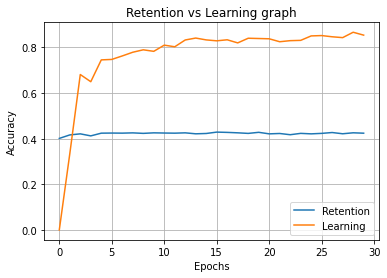

In [ ]:
plt.plot(range(30),retention_accuracy,label="Retention")
plt.plot(range(30),learning_accuracy,label="Learning")
plt.grid()
plt.legend(loc="best")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Retention vs Learning graph")
plt.show()